In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

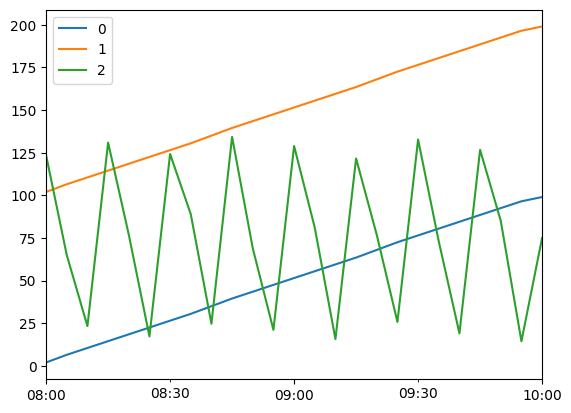

In [63]:
class TimeFrame:
    def __init__(self, data):
        if isinstance(data, TimeSeries):
            self.ts_list = [data]
            
        elif isinstance(data, TimeFrame):
            self.ts_list = data.ts_list

        elif isinstance(data, list):
            for d in data:
                if isinstance(d, TimeSeries):
                    pass
                else:
                    raise ValueError('This is not a TimeSeries or TimeFrame object.')

            self.ts_list = data
            
        else:
            raise ValueError('This is not a TimeSeries or TimeFrame object.')

    def __add__(self, other):
        if isinstance(other, TimeSeries):
            # new_tf = self.data + other.data
            new_tf = self.ts_list + [other,]
            return TimeFrame(new_tf)
            
        elif isinstance(other, TimeFrame):
            new_tf = self.ts_list + other.ts_list
            # print(type(new_tf))
            return TimeFrame(new_tf)
            
        else:
            raise ValueError('You can only add a TimeSeries object or a TimeFrame object to a TimeFrame object.')

    def window(self, freq):
        grouped_by = [ts.window(freq=freq) for ts in self.ts_list]
        return pd.concat(grouped_by, axis=1)


class TimeSeries:
    def __init__(self, data, agg_func=None):
        self.data = data
        self.agg_func = agg_func

    def __add__(self, other):
        if isinstance(other, TimeSeries):
            ts1 = TimeSeries(self.data, self.agg_func)
            ts2 = other
            tf = TimeFrame(ts1) + TimeFrame(ts2)
            return tf
        else:
            raise ValueError('You can only add TimeSeries objects to TimeSeries objects.')

    def window(self, freq):
        return self.data.groupby(pd.Grouper(freq=freq)).apply(self.agg_func)


t = pd.date_range('2001-09-11 08:00:00', '2001-09-11 10:00:00', periods=100)
data1 = pd.DataFrame({'value': np.arange(0, 100, 1)}, index=t)
data2 = pd.DataFrame({'value': np.arange(100, 200, 1)}, index=t)
data3 = pd.DataFrame({'value': 75 + 75*np.sin(np.linspace(0, 16*np.pi, 100))}, index=t)
ts1 = TimeSeries(data1, agg_func=np.mean)
ts2 = TimeSeries(data2, agg_func=np.mean)
ts3 = TimeSeries(data3, agg_func=np.mean)
# ts1.window('59s').plot()

tf = ts1 + ts2 + ts3
tf.window('5min').plot()

In [18]:
[2, 3] + [4, 5]

[2, 3, 4, 5]

In [22]:
[2,]

[2]

In [19]:
t = pd.date_range('2001-09-11 08:00:00', '2001-09-11 10:00:00', periods=100)
data1 = pd.DataFrame({'value': np.arange(0, 100, 1)}, index=t)
data2 = pd.DataFrame({'value': np.arange(100, 200, 1)}, index=t)
data3 = pd.DataFrame({'value': 75 + 75*np.sin(np.linspace(0, 16*np.pi, 100))}, index=t)
ts1 = TimeSeries(data1, agg_func=np.mean)
ts2 = TimeSeries(data2, agg_func=np.mean)
ts3 = TimeSeries(data3, agg_func=np.mean)
# ts1.window('59s').plot()

ts1 + ts2 + ts3
# tf.window('5min').plot()
tf = ts1 + ts2 + ts3
tf.window('5min').plot()

AttributeError: 'NoneType' object has no attribute 'window'

<Axes: >

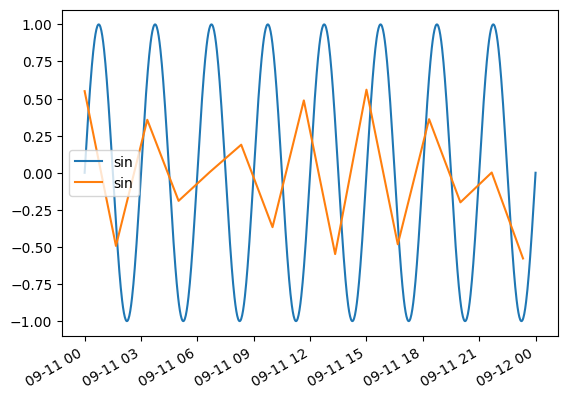

In [25]:
data1 = pd.DataFrame({'sin':np.sin(np.linspace(0, 16*np.pi, 1000))}
                      , index=pd.date_range('2001-09-11', '2001-09-12', 1000))

fig, ax = plt.subplots()
data1.plot(ax=ax)
data1.groupby(pd.Grouper(freq='100min')).mean().dropna().plot(ax=ax)

<Axes: >

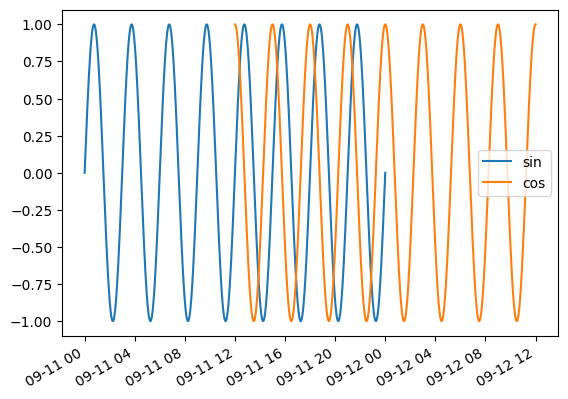

In [40]:
data2 = pd.DataFrame({'cos':np.cos(np.linspace(0, 16*np.pi, 1000))}
                      , index=pd.date_range('2001-09-11 12:00:00', '2001-09-12 12:00:00', 1000))

fig, ax = plt.subplots()
data1.plot(ax=ax)
data2.plot(ax=ax)

In [41]:
data1.groupby(pd.Grouper(freq='5min')).mean().join(data2.groupby(pd.Grouper(freq='5min')).mean())

,sin,cos
2001-09-11 00:00:00,7.528281e-02,NaN
2001-09-11 00:05:00,2.487235e-01,NaN
2001-09-11 00:10:00,4.141088e-01,NaN
2001-09-11 00:15:00,5.672871e-01,NaN
2001-09-11 00:20:00,7.020925e-01,NaN
...,...,...
2001-09-11 23:40:00,-5.672871e-01,0.821888
2001-09-11 23:45:00,-4.141088e-01,0.909161
2001-09-11 23:50:00,-2.487235e-01,0.966989
2001-09-11 23:55:00,-1.003771e-01,0.996312


<Axes: >

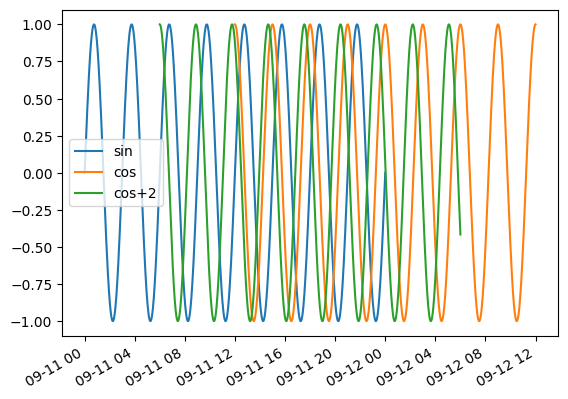

In [46]:
data3 = pd.DataFrame({'cos+2':np.cos(np.linspace(0, 16*np.pi+2, 1000))}
                      , index=pd.date_range('2001-09-11 06:00:00', '2001-09-12 06:00:00', 1000))

fig, ax = plt.subplots()
data1.plot(ax=ax)
data2.plot(ax=ax)
data3.plot(ax=ax)

<Axes: >

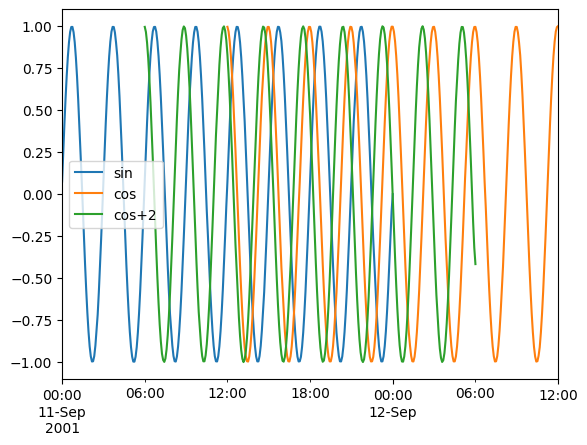

In [55]:
data1.groupby(pd.Grouper(freq='5min')).mean() \
.join(data2.groupby(pd.Grouper(freq='5min')).mean(), how='outer') \
.join(data3.groupby(pd.Grouper(freq='5min')).mean(), how='outer').plot()